/tmp/ipykernel_1595206/514336913.py:69: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap('tab10')
/tmp/ipykernel_1595206/514336913.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/tmp/ipykernel_1595206/514336913.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/tmp/ipykernel_1595206/514336913.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.

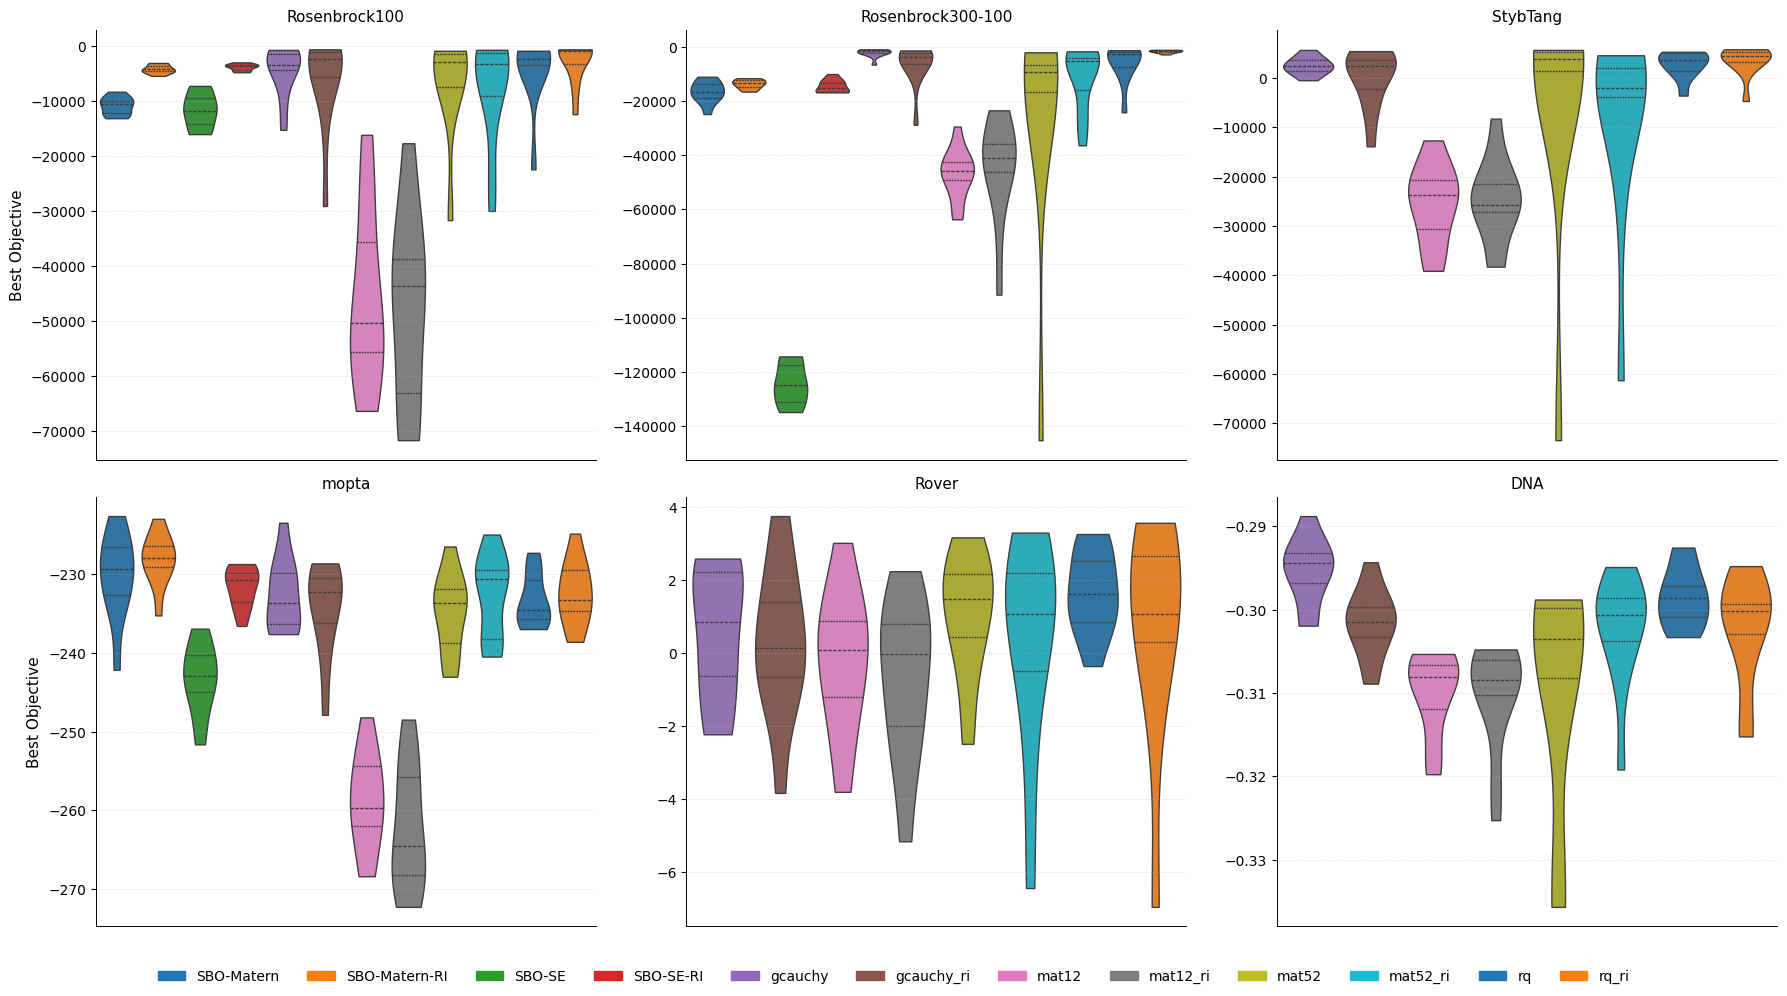

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from matplotlib.cm import get_cmap
from matplotlib.patches import Patch
from pathlib import Path
import re

# — Adjust this to point to your results folder —
base_dir = './results'

# — Matplotlib styling —
mpl.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': ['Arial','DejaVu Sans','Liberation Sans'],
    'font.size': 11,
    'axes.labelsize': 11,
    'axes.titlesize': 11,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10,
    'figure.titlesize': 11
})

def load_results(func_name: str, base_dir: str = '.') -> pd.DataFrame:
    base = Path(base_dir) / func_name
    if not base.is_dir():
        raise FileNotFoundError(f"{base} is not a directory")
    dfs = []
    for kernel_dir in base.iterdir():
        if not kernel_dir.is_dir(): continue
        kernel = kernel_dir.name
        pattern = f"{func_name}_{kernel}_seed*.csv"
        for csv_path in kernel_dir.glob(pattern):
            m = re.search(r'_(?:seed)?(\d+)$', csv_path.stem)
            if not m: continue
            df = pd.read_csv(csv_path)
            df['kernel'] = kernel
            df['seed']   = int(m.group(1))
            dfs.append(df)
    if not dfs:
        raise FileNotFoundError(f"No CSVs under {base}")
    return pd.concat(dfs, ignore_index=True)

# — Exact order for a 2×3 grid —
ordered_funcs = [
    'Rosenbrock100',   'Rosenbrock300-100',  'StybTang',
    'mopta',           'Rover',              'DNA'
]

# — Load & compute best_obj for each —
finals = {}
all_kernels = set()
for fn in ordered_funcs:
    df = load_results(fn, base_dir)
    df = df.sort_values(['kernel','seed','iteration'])
    df['best_obj'] = df.groupby(['kernel','seed'])['best_obj_val'].cummax()
    final = (
        df[df['iteration'] == df['iteration'].max()]
          .groupby(['kernel','seed'], as_index=False)['best_obj']
          .last()
          .query("kernel != 'Vanilla_BO'")
    )
    finals[fn] = final
    all_kernels.update(final['kernel'].unique())

# — Global palette for all kernels —
cmap = get_cmap('tab10')
union_kernels = sorted(all_kernels)
palette_map = {k: cmap(i % 10) for i,k in enumerate(union_kernels)}

# — Create 2×3 violin grid WITHOUT sharey —
fig, axes = plt.subplots(2, 3, figsize=(18, 10), sharey=False)
axes = axes.flatten()

for idx, fn in enumerate(ordered_funcs):
    ax = axes[idx]
    final = finals[fn]
    kernels = sorted(final['kernel'].unique())
    palette = [palette_map[k] for k in kernels]
    sns.violinplot(
        data=final, x='kernel', y='best_obj',
        order=kernels, palette=palette,
        inner='quartile', linewidth=1, cut=0,
        ax=ax
    )
    ax.set_title(fn)
    ax.set_xlabel('')
    ax.tick_params(axis='x', which='both',
                   bottom=False, top=False, labelbottom=False)
    ax.set_ylabel('Final Value' if idx % 3 == 0 else '')
    ax.grid(axis='y', linestyle=':', alpha=0.5, linewidth=0.6)
    for sp in ['top','right']:
        ax.spines[sp].set_visible(False)
    for sp in ['left','bottom']:
        ax.spines[sp].set_linewidth(0.7)

# — Shared legend at bottom —
patches = [Patch(color=palette_map[k], label=k) for k in union_kernels]
fig.legend(handles=patches, loc='lower center',
           ncol=len(union_kernels), frameon=False)

plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()


/tmp/ipykernel_1599156/1816547177.py:115: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap('tab10')
/tmp/ipykernel_1599156/1816547177.py:129: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/tmp/ipykernel_1599156/1816547177.py:129: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/tmp/ipykernel_1599156/1816547177.py:129: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

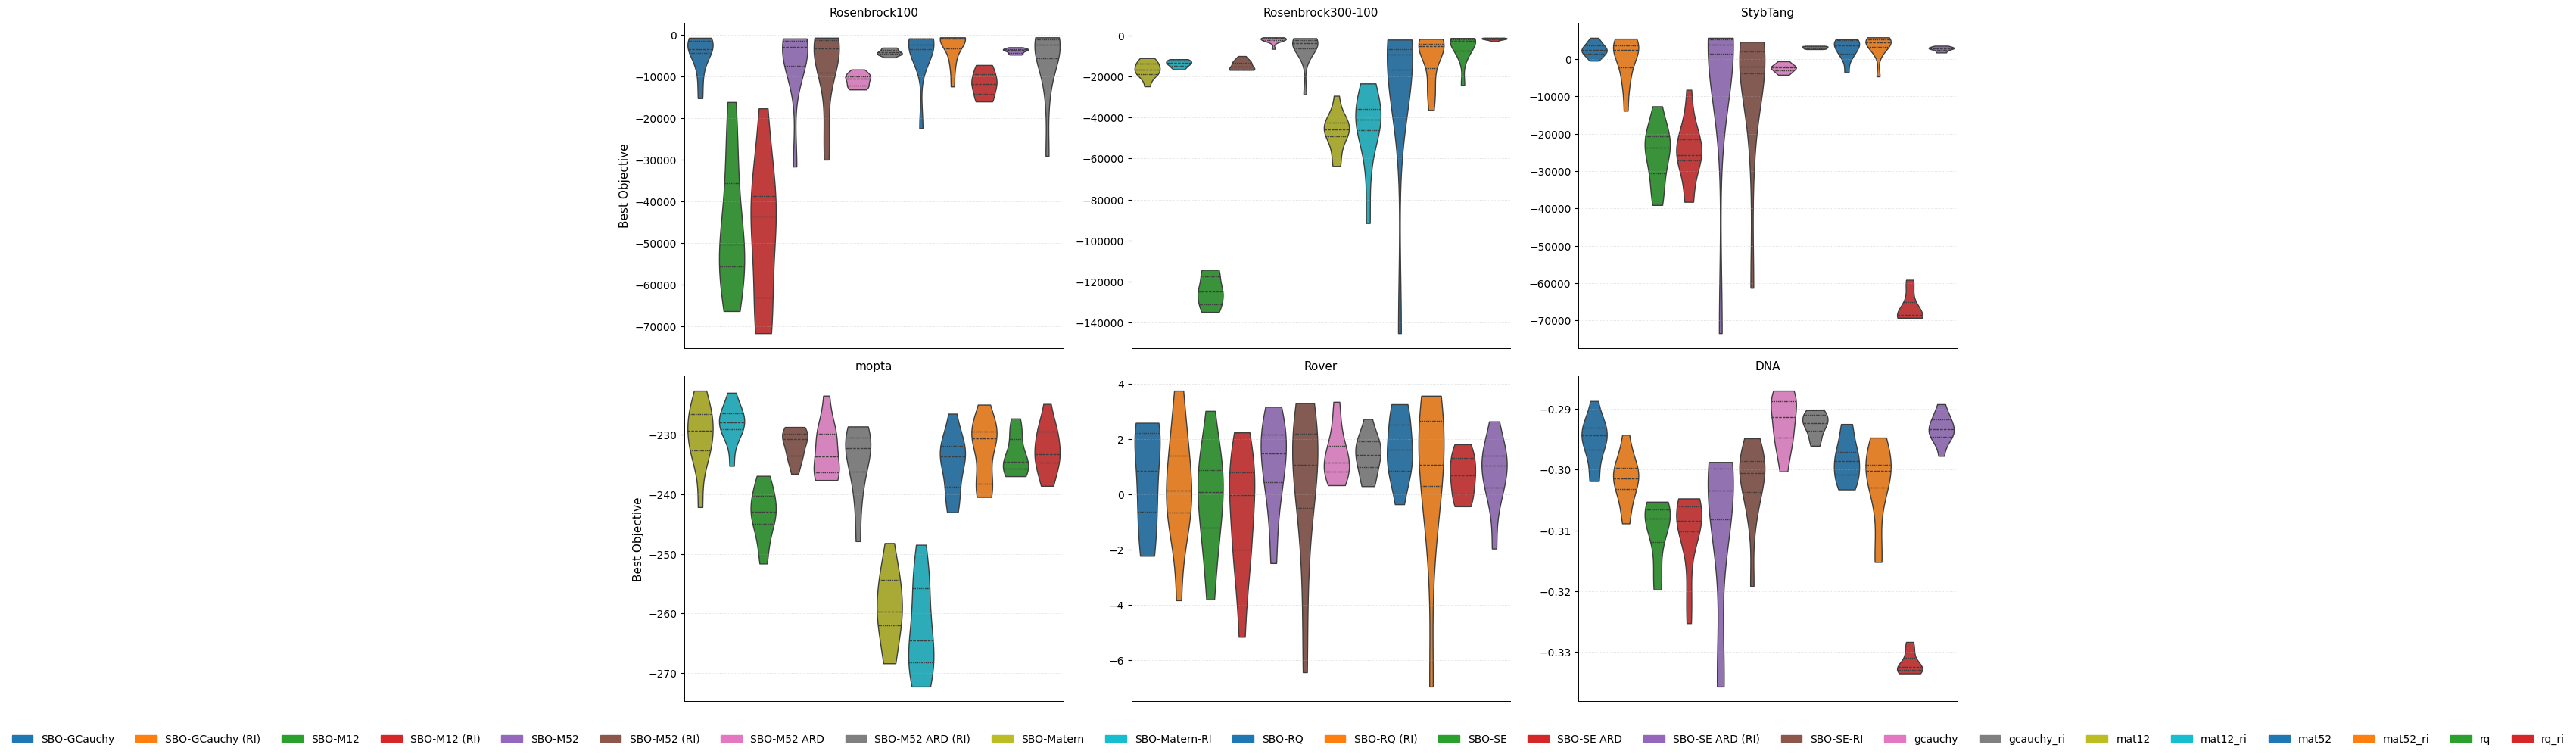

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from matplotlib.cm import get_cmap
from matplotlib.patches import Patch
from pathlib import Path
import re

# ─── Path to your results folder ───
base_dir = Path('./results')   # adjust if your script/notebook lives elsewhere

# ─── Matplotlib styling ───
mpl.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': ['Arial', 'DejaVu Sans', 'Liberation Sans'],
    'font.size': 11,
    'axes.labelsize': 11,
    'axes.titlesize': 11,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10,
    'figure.titlesize': 11
})

# ─── Hardcoded CSVs for single‐file benchmarks ───
csv_only = {
    'StybTang': 'StybTang200.csv',
    'Rover':    'rover.csv',
    'DNA':      'DNA.csv'
}

def load_results(func_name: str, base_dir: Path) -> pd.DataFrame:
    """
    Load results for func_name:
     • If func_name in csv_only, read that CSV.
     • Otherwise, read all CSVs under base_dir/func_name/<kernel>/,
       and—for Rosenbrock100—rename certain kernels according to a mapping.
    """
    # 1) CSV‐only benchmarks
    if func_name in csv_only:
        df = pd.read_csv(base_dir / csv_only[func_name])
    else:
        # 2) Directory‐based benchmarks
        dir_path = base_dir / func_name
        dfs = []
        # kernel‐rename map for Rosenbrock100
        rb_map = {
            'gcauchy':        'SBO-GCauchy',
            'gcauchy_RI':     'SBO-GCauchy (RI)',
            'mat12':          'SBO-M12',
            'mat12_ri':       'SBO-M12 (RI)',
            'mat52':          'SBO-M52',
            'mat52_ri':       'SBO-M52 (RI)',
            'rq':             'SBO-RQ',
            'rq_ri':          'SBO-RQ (RI)',
            'SBO-Matern':     'SBO-M52 ARD',
            'SBO-Matern-RI':  'SBO-M52 ARD (RI)',
            'SBO-SE':         'SBO-SE ARD',
            'SBO-SE-RI':      'SBO-SE ARD (RI)',
        }

        for kd in dir_path.iterdir():
            if not kd.is_dir():
                continue
            raw_kernel = kd.name
            # determine final kernel name
            if func_name == 'Rosenbrock100':
                kernel = rb_map.get(raw_kernel, raw_kernel)
            else:
                kernel = raw_kernel

            # load all seed CSVs for this kernel
            pattern = f"{func_name}_{raw_kernel}_seed*.csv"
            for p in kd.glob(pattern):
                m = re.search(r'_(?:seed)?(\d+)$', p.stem)
                if not m:
                    continue
                df0 = pd.read_csv(p)
                df0['kernel'] = kernel
                df0['seed']   = int(m.group(1))
                dfs.append(df0)

        df = pd.concat(dfs, ignore_index=True)

    # Compute final best_obj if raw iteration data present
    if {'kernel', 'seed', 'iteration', 'best_obj_val'}.issubset(df.columns):
        df = df.sort_values(['kernel', 'seed', 'iteration'])
        df['best_obj'] = df.groupby(['kernel', 'seed'])['best_obj_val'].cummax()
        df = (
            df[df['iteration'] == df['iteration'].max()]
              .groupby(['kernel', 'seed'], as_index=False)['best_obj']
              .last()
              .query("kernel != 'Vanilla_BO'")
        )

    # Else assume df already has columns: kernel, seed, best_obj
    return df


# ─── Exact order for a 2×3 grid ───
ordered_funcs = [
    'Rosenbrock100', 'Rosenbrock300-100', 'StybTang',
    'mopta',       'Rover',             'DNA'
]

# ─── Load & prepare data ───
finals = {}
all_kernels = set()
for fn in ordered_funcs:
    finals[fn] = load_results(fn, base_dir)
    all_kernels.update(finals[fn]['kernel'].unique())

# ─── Unified color palette ───
cmap = get_cmap('tab10')
kern_list = sorted(all_kernels)
palette_map = {k: cmap(i % 10) for i, k in enumerate(kern_list)}

# ─── Plot 2×3 violin grid ───
fig, axes = plt.subplots(2, 3, figsize=(18, 10), sharey=False)
axes = axes.flatten()

for idx, fn in enumerate(ordered_funcs):
    ax = axes[idx]
    df = finals[fn]
    kernels = sorted(df['kernel'].unique())
    palette = [palette_map[k] for k in kernels]

    sns.violinplot(
        data=df,
        x='kernel',
        y='best_obj',
        order=kernels,
        palette=palette,
        inner='quartile',
        linewidth=1,
        cut=0,
        ax=ax
    )
    ax.set_title(fn)
    ax.set_xlabel('')
    ax.tick_params(axis='x', bottom=False, top=False, labelbottom=False)
    ax.set_ylabel('Best Objective' if idx % 3 == 0 else '')
    ax.grid(axis='y', linestyle=':', alpha=0.5, linewidth=0.6)
    for sp in ['top', 'right']:
        ax.spines[sp].set_visible(False)
    for sp in ['left', 'bottom']:
        ax.spines[sp].set_linewidth(0.7)

# ─── Shared legend at bottom ───
patches = [Patch(color=palette_map[k], label=k) for k in kern_list]
fig.legend(handles=patches, loc='lower center', ncol=len(kern_list), frameon=False)

plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()


/tmp/ipykernel_1599156/4015408707.py:123: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap('tab10')
/tmp/ipykernel_1599156/4015408707.py:142: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/tmp/ipykernel_1599156/4015408707.py:142: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/tmp/ipykernel_1599156/4015408707.py:142: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

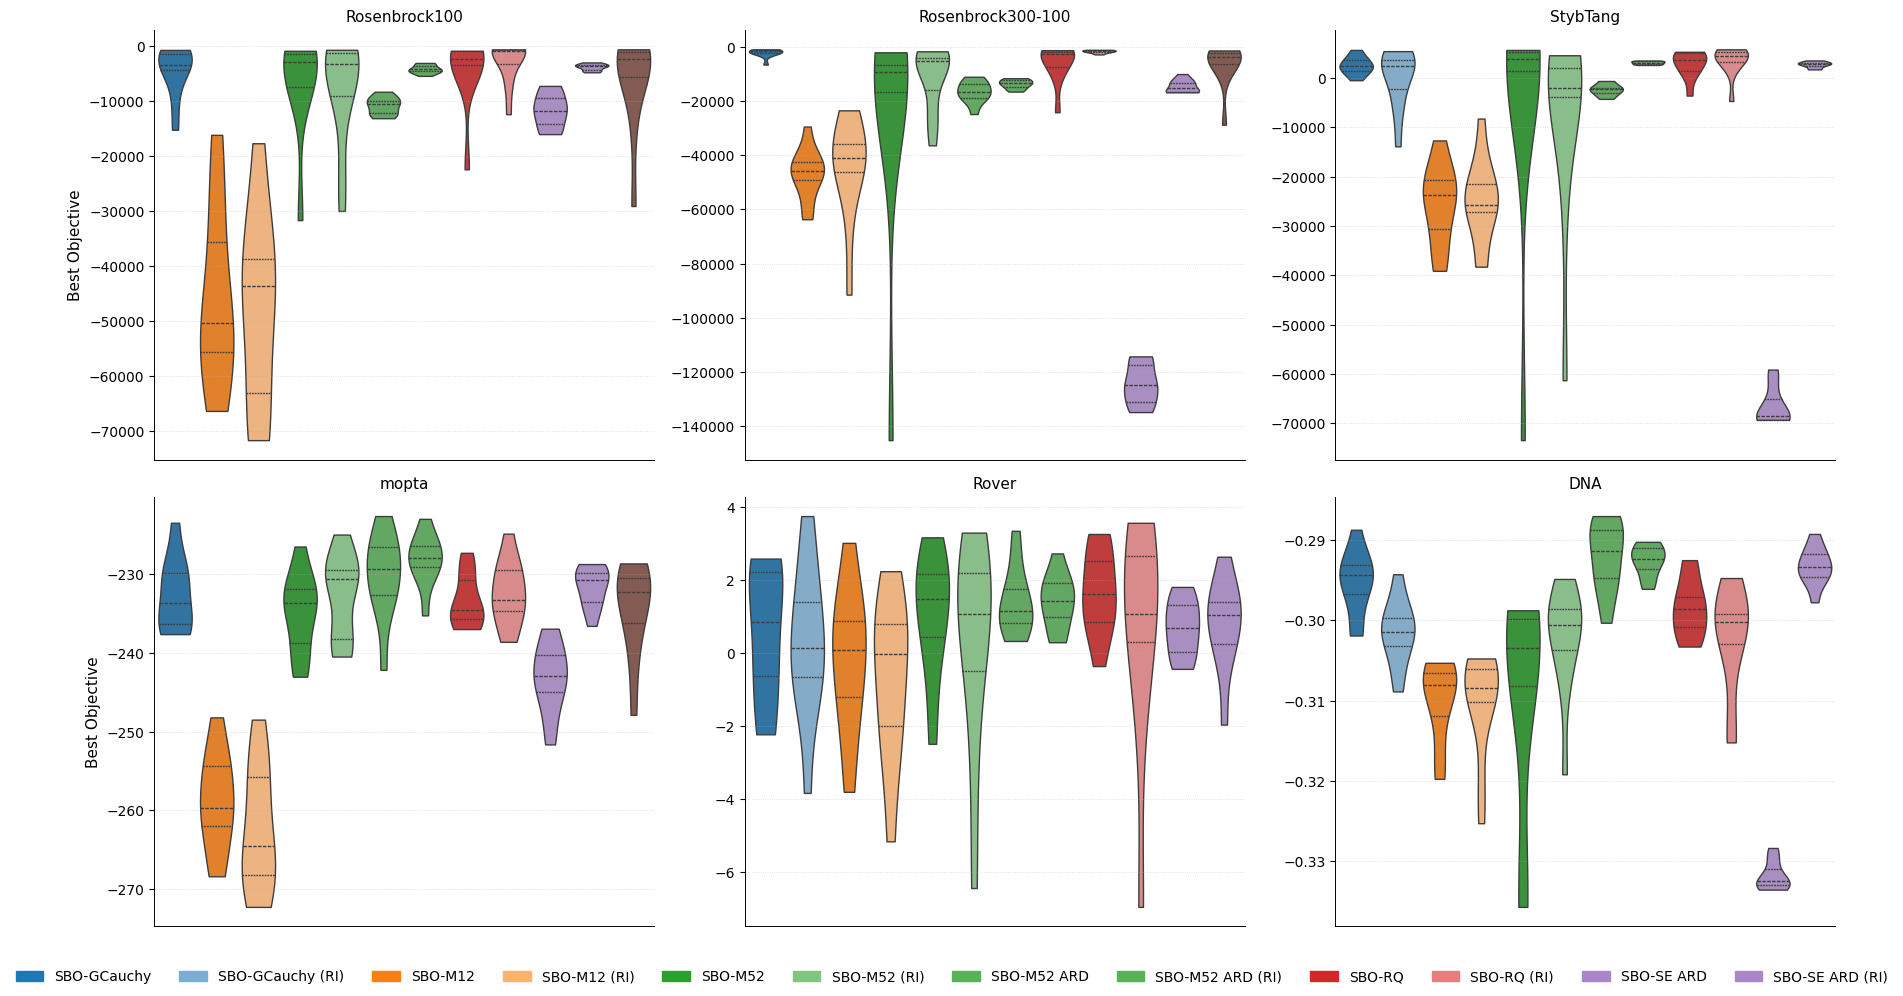

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from matplotlib.cm import get_cmap
from matplotlib.patches import Patch
from pathlib import Path
import re
import matplotlib.colors as mcolors

# ─── Path to your results folder ───
base_dir = Path('./results')   # adjust if your script/notebook lives elsewhere

# ─── Matplotlib styling ───
mpl.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': ['Arial', 'DejaVu Sans', 'Liberation Sans'],
    'font.size': 11,
    'axes.labelsize': 11,
    'axes.titlesize': 11,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10,
    'figure.titlesize': 11
})

# ─── CSV‐only fallbacks ───
csv_only = {
    'StybTang': 'StybTang200.csv',
    'Rover':    'rover.csv',
    'DNA':      'DNA.csv'
}

# ─── Global rename map ───
kernel_map = {
    'gcauchy':        'SBO-GCauchy',
    'gcauchy_ri':     'SBO-GCauchy (RI)',
    'mat12':          'SBO-M12',
    'mat12_ri':       'SBO-M12 (RI)',
    'mat52':          'SBO-M52',
    'mat52_ri':       'SBO-M52 (RI)',
    'rq':             'SBO-RQ',
    'rq_ri':          'SBO-RQ (RI)',
    'SBO-Matern':     'SBO-M52 ARD',
    'SBO-Matern-RI':  'SBO-M52 ARD (RI)',
    'SBO-SE':         'SBO-SE ARD',
    'SBO-SE-RI':      'SBO-SE ARD (RI)',
}

def lighten(color, amount=0.3):
    """Lighten an RGB tuple by blending with white."""
    r, g, b = mcolors.to_rgb(color)
    return (r + (1-r)*amount,
            g + (1-g)*amount,
            b + (1-b)*amount)

def variant_color(base, name):
    """Shade variants (RI, ARD) of a base color."""
    if '(RI)' in name and 'ARD' in name:
        return lighten(base, 0.2)
    elif '(RI)' in name:
        return lighten(base, 0.4)
    elif 'ARD' in name:
        return lighten(base, 0.2)
    else:
        return base

def load_results(fn, base_dir):
    # 1) CSV-only benchmarks
    if fn in csv_only:
        df = pd.read_csv(base_dir / csv_only[fn])
    else:
        # 2) Directory-based benchmarks
        dfs = []
        d = base_dir / fn
        for kd in d.iterdir():
            if not kd.is_dir():
                continue
            raw = kd.name
            for p in kd.glob(f"{fn}_{raw}_seed*.csv"):
                m = re.search(r'_(?:seed)?(\d+)$', p.stem)
                if not m:
                    continue
                tmp = pd.read_csv(p)
                tmp['kernel'] = raw
                tmp['seed']   = int(m.group(1))
                dfs.append(tmp)
        df = pd.concat(dfs, ignore_index=True)

    # Compute final best_obj if raw iteration data present
    if {'kernel','seed','iteration','best_obj_val'}.issubset(df.columns):
        df = df.sort_values(['kernel','seed','iteration'])
        df['best_obj'] = df.groupby(['kernel','seed'])['best_obj_val'].cummax()
        df = (
            df[df['iteration'] == df['iteration'].max()]
              .groupby(['kernel','seed'], as_index=False)['best_obj']
              .last()
              .query("kernel!='Vanilla_BO'")
        )

    # Apply rename map to all kernels
    df['kernel'] = df['kernel'].replace(kernel_map)
    return df

# ─── Exact order for a 2×3 grid ───
ordered = [
    'Rosenbrock100',
    'Rosenbrock300-100',
    'StybTang',
    'mopta',
    'Rover',
    'DNA'
]

# ─── Load data ───
finals = {fn: load_results(fn, base_dir) for fn in ordered}

# ─── Gather all pretty kernels ───
all_kernels = sorted({k for df in finals.values() for k in df['kernel'].unique()})

# ─── Assign base colors by root name ───
roots = sorted({k.replace(' (RI)','').replace(' ARD','') for k in all_kernels})
cmap = get_cmap('tab10')
base_colors = {root: cmap(i % 10) for i, root in enumerate(roots)}

# ─── Build palette_map including variants ───
palette_map = {
    k: variant_color(base_colors[k.replace(' (RI)','').replace(' ARD','')], k)
    for k in all_kernels
}

# ─── Plot 2×3 violin grid ───
fig, axes = plt.subplots(2, 3, figsize=(18, 10), sharey=False)
axes = axes.flatten()

for i, fn in enumerate(ordered):
    ax = axes[i]
    df = finals[fn]
    ks = sorted(df['kernel'].unique())
    pal = [palette_map[k] for k in ks]

    sns.violinplot(
        data=df,
        x='kernel',
        y='best_obj',
        order=ks,
        palette=pal,
        inner='quartile',
        linewidth=1,
        cut=0,
        ax=ax
    )
    ax.set_title(fn)
    ax.set_xlabel('')
    ax.tick_params(bottom=False, top=False, labelbottom=False)
    ax.set_ylabel('Best Objective' if i % 3 == 0 else '')
    ax.grid(axis='y', linestyle=':', alpha=0.5, linewidth=0.6)
    for sp in ['top','right']:
        ax.spines[sp].set_visible(False)
    for sp in ['left','bottom']:
        ax.spines[sp].set_linewidth(0.7)

# ─── Shared legend at bottom ───
legend_order = [
    'SBO-GCauchy','SBO-GCauchy (RI)',
    'SBO-M12','SBO-M12 (RI)',
    'SBO-M52','SBO-M52 (RI)',
    'SBO-M52 ARD','SBO-M52 ARD (RI)',
    'SBO-RQ','SBO-RQ (RI)',
    'SBO-SE ARD','SBO-SE ARD (RI)'
]
patches = [Patch(color=palette_map[k], label=k)
           for k in legend_order if k in palette_map]
fig.legend(handles=patches, loc='lower center', ncol=len(patches), frameon=False)

plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()
